In [1]:
# autoreload
%load_ext autoreload
%autoreload 2

In [90]:
# do imports
import pandas
import numpy
import matplotlib.pyplot as plt
import soccer_database
import numpy as np
import pandas as pd

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import warnings
import seaborn as sns
import scipy
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.impute import SimpleImputer
import graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [6]:
db = soccer_database.SoccerDatabase('database.sqlite')
print("made db")
db.create_player_data()
print("created player data")
db.create_team_data()
print("created team data")

train_matches, test_matches = db.create_train_test_matches()

print("created train test matches")

match_features = ["record", "goal_diff", "oppenent_rating",'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA']
team_attributes_features = ["buildUpPlaySpeed", "buildUpPlayPassing", "chanceCreationPassing", "chanceCreationCrossing", "defenceAggression", "defenceTeamWidth"]
player_avg_features = ["overall_rating"]
player_ind_features = ["overall_rating", "height", "weight", "sprint_speed", "stamina"]
    

made db
created player data
created team data
created train test matches


In [118]:
for i in range(len(train_matches)):
    #train_matches[i].load_match_data(team_attributes_features, player_avg_features, player_ind_features)
    train_matches[i].load_match_data()
    if i % 100 == 0:
        print(f"Loaded {i} train matches out of {len(train_matches)}")
for i in range(len(test_matches)):
    #test_matches[i].load_match_data(player_avg_features, player_ind_features)
    test_matches[i].load_match_data()
    if i % 100 == 0:
        print(f"Loaded {i} test matches out of {len(test_matches)}")

[autoreload of soccer_database failed: Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniconda/base/envs/MLProject/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/opt/homebrew/Caskroom/miniconda/base/envs/MLProject/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "/opt/homebrew/Caskroom/miniconda/base/envs/MLProject/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 397, in update_generic
    update(a, b)
  File "/opt/homebrew/Caskroom/miniconda/base/envs/MLProject/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 365, in update_class
    update_instances(old, new)
  File "/opt/homebrew/Caskroom/miniconda/base/envs/MLProject/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 319, in update_instances
    refs = gc.get_referrers(old)
          

Loaded 0 train matches out of 19328
Loaded 100 train matches out of 19328
Loaded 200 train matches out of 19328
Loaded 300 train matches out of 19328


KeyboardInterrupt: 

In [252]:
match_features = ["record", "goal_diff", "oppenent_rating"]#,'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA']
team_attributes_features = ["buildUpPlaySpeed", "buildUpPlayPassing", "chanceCreationPassing", "chanceCreationCrossing", "defenceAggression", "defenceTeamWidth"]
player_avg_features = ["overall_rating","height", "weight", "sprint_speed", "stamina", "potential"]
player_ind_features = ["overall_rating"]

In [253]:
X_train, y_train, columns = soccer_database.get_features_for_matches(
    train_matches, 
    match_features,
    team_attributes_features,
    player_avg_features,
    player_ind_features,
    "win_loss",
    False
)

Processed 0 matches
Processed 100 matches
Processed 200 matches
Processed 300 matches
Processed 400 matches
Processed 500 matches
Processed 600 matches
Processed 700 matches
Processed 800 matches
Processed 900 matches
Processed 1000 matches
Processed 1100 matches
Processed 1200 matches
Processed 1300 matches
Processed 1400 matches
Processed 1500 matches
Processed 1600 matches
Processed 1700 matches
Processed 1800 matches
Processed 1900 matches
Processed 2000 matches
Processed 2100 matches
Processed 2200 matches
Processed 2300 matches
Processed 2400 matches
Processed 2500 matches
Processed 2600 matches
Processed 2700 matches
Processed 2800 matches
Processed 2900 matches
Processed 3000 matches
Processed 3100 matches
Processed 3200 matches
Processed 3300 matches
Processed 3400 matches
Processed 3500 matches
Processed 3600 matches
Processed 3700 matches
Processed 3800 matches
Processed 3900 matches
Processed 4000 matches
Processed 4100 matches
Processed 4200 matches
Processed 4300 matches


In [254]:
X_test, y_test, columns = soccer_database.get_features_for_matches(
    test_matches, 
    match_features,
    team_attributes_features,
    player_avg_features,
    player_ind_features,
    "win_loss",
    False
)

Processed 0 matches
Processed 100 matches
Processed 200 matches
Processed 300 matches
Processed 400 matches
Processed 500 matches
Processed 600 matches
Processed 700 matches
Processed 800 matches
Processed 900 matches
Processed 1000 matches
Processed 1100 matches
Processed 1200 matches
Processed 1300 matches
Processed 1400 matches
Processed 1500 matches
Processed 1600 matches
Processed 1700 matches
Processed 1800 matches
Processed 1900 matches
Processed 2000 matches
Processed 2100 matches
Processed 2200 matches
Processed 2300 matches
Processed 2400 matches
Processed 2500 matches
Processed 2600 matches
Processed 2700 matches
Processed 2800 matches
Processed 2900 matches
Processed 3000 matches
Processed 3100 matches
Processed 3200 matches
Processed 3300 matches
Processed 3400 matches
Processed 3500 matches
Processed 3600 matches
Processed 3700 matches
Processed 3800 matches
Processed 3900 matches
Processed 4000 matches
Processed 4100 matches
Processed 4200 matches
Processed 4300 matches


In [255]:
param_dist = {'n_estimators': scipy.stats.randint(50,500),
              'max_depth': scipy.stats.randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 18, 'n_estimators': 390}


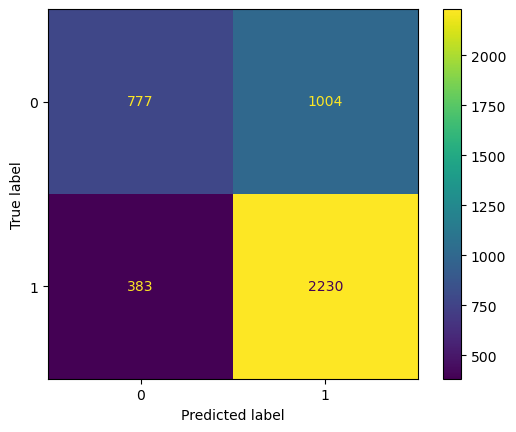

In [256]:
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [257]:
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.684342284934001
Precision: 0.6895485466914039
Recall: 0.8534251817833908


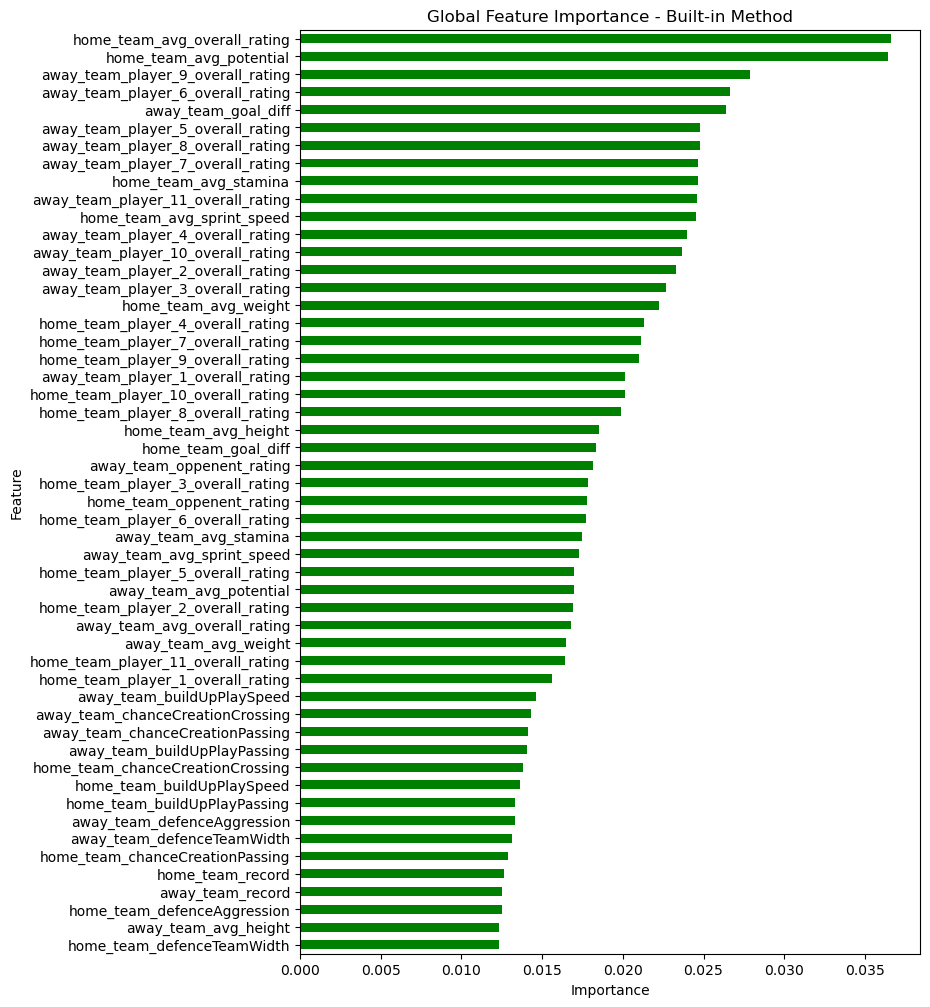

In [258]:
global_importances = pd.Series(best_rf.feature_importances_, index=columns)
global_importances.sort_values(ascending=True, inplace=True)
plt.figure(figsize=(8, 12))
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")
plt.savefig('feature_importance.png')

In [259]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np

In [260]:


class MLP(nn.Module):
    def __init__(self, input_size, h1, h2):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(in_features=input_size, out_features=h1)
        self.fc2 = nn.Linear(in_features=h1, out_features=h2)
        self.fc3 = nn.Linear(in_features=h2, out_features=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Replace 'your_input_size' with the size of your input features

# Instantiate the model
model = MLP(X_train.shape[1], 128, 256)

# Print the model architecture
print(model)

MLP(
  (fc1): Linear(in_features=52, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [261]:
# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train).to(dtype=torch.float32)
y_train_tensor = torch.from_numpy(y_train).to(dtype=torch.float32).reshape(y_train.shape[0],1)
X_val_tensor = torch.from_numpy(X_test).to(dtype=torch.float32)
y_val_tensor = torch.from_numpy(y_test).to(dtype=torch.float32).reshape(y_test.shape[0],1)

# Create DataLoader for training and validation sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Instantiate the model
model = MLP(X_train.shape[1],256,512)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.000005)

# Training loop
epochs = 15
epoch_list = []
train_loss = []
test_loss = []
accuracies = []

for epoch in range(epochs):
    model.train()
    loss_test = 0.0
    count = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss_test += loss.item()
        count += 1
        loss.backward()
        optimizer.step()
    loss_test /= count
    # Validation
    model.eval()
    val_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            val_loss += criterion(outputs, labels).item()
            predicted = (outputs > 0.5).float()
            correct_predictions += (predicted == labels).sum().item()
            total_samples += labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    accuracy = correct_predictions / total_samples
    
    epoch_list.append(epoch)
    accuracies.append(accuracy)
    train_loss.append(loss_test)
    test_loss.append(avg_val_loss)
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss_test:.4f}, Validation Loss: {avg_val_loss:.4f}, Accuracy: {accuracy:.4f}')

# Save the trained model (optional)
torch.save(model.state_dict(), 'mlp_model.pth')

Epoch [1/15], Loss: 0.7182, Validation Loss: 0.6584, Accuracy: 0.6113
Epoch [2/15], Loss: 0.6312, Validation Loss: 0.6441, Accuracy: 0.6270
Epoch [3/15], Loss: 0.6188, Validation Loss: 0.6254, Accuracy: 0.6443
Epoch [4/15], Loss: 0.6122, Validation Loss: 0.6154, Accuracy: 0.6525
Epoch [5/15], Loss: 0.6047, Validation Loss: 0.6083, Accuracy: 0.6602
Epoch [6/15], Loss: 0.6023, Validation Loss: 0.6057, Accuracy: 0.6698
Epoch [7/15], Loss: 0.5994, Validation Loss: 0.5995, Accuracy: 0.6702
Epoch [8/15], Loss: 0.5929, Validation Loss: 0.6033, Accuracy: 0.6666
Epoch [9/15], Loss: 0.5927, Validation Loss: 0.5954, Accuracy: 0.6702
Epoch [10/15], Loss: 0.5886, Validation Loss: 0.5967, Accuracy: 0.6721
Epoch [11/15], Loss: 0.5866, Validation Loss: 0.5914, Accuracy: 0.6750
Epoch [12/15], Loss: 0.5900, Validation Loss: 0.5910, Accuracy: 0.6723
Epoch [13/15], Loss: 0.5845, Validation Loss: 0.6130, Accuracy: 0.6659
Epoch [14/15], Loss: 0.5869, Validation Loss: 0.5906, Accuracy: 0.6746
Epoch [15/15], 

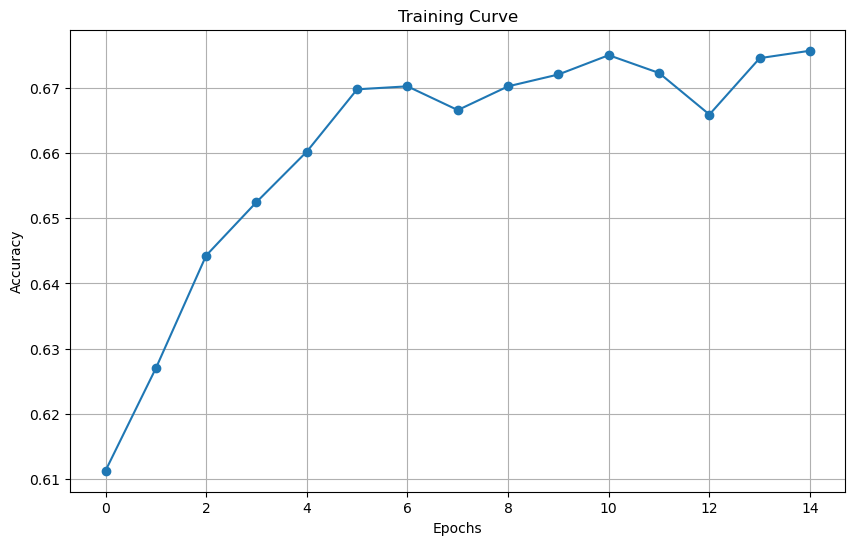

In [262]:
# Plot the training curve
plt.figure(figsize=(10, 6))
plt.plot(epoch_list, accuracies, marker='o', linestyle='-')
plt.title('Training Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.savefig('training.png')

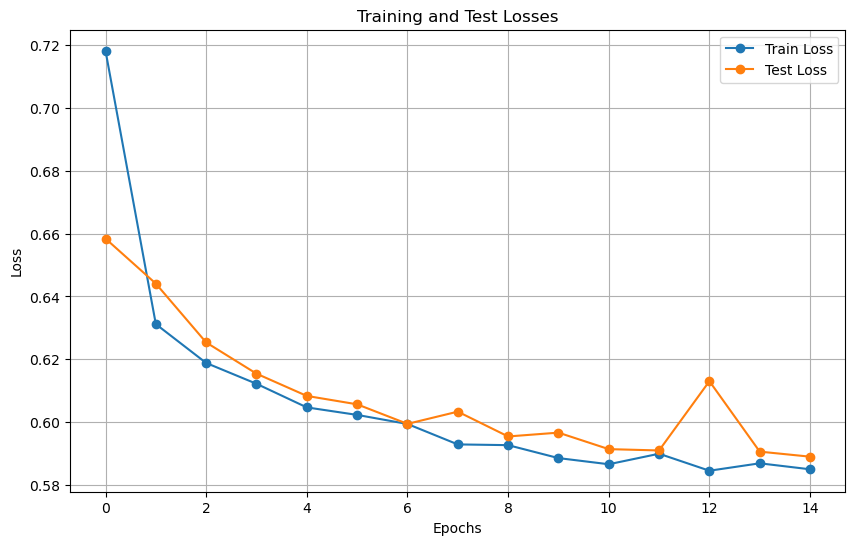

In [263]:
# Plot the training and test losses
plt.figure(figsize=(10, 6))
plt.plot(epoch_list, train_loss, marker='o', linestyle='-', label='Train Loss')
plt.plot(epoch_list, test_loss, marker='o', linestyle='-', label='Test Loss')
plt.title('Training and Test Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()  # Show legend with labels
plt.grid(True)
plt.savefig('training_loss.png')
